Package loading

In [178]:
using Plots
using Combinatorics
using LinearAlgebra
using Cuba
using Symbolics
using SparseArrays
include("definitions.jl")
include("1slice.jl")
include("wynn.jl")

wynn (generic function with 1 method)

# Integration in Sector I

## Plots of the integrand

In [ ]:
bsI = range(-14.14, -10.01, 1000)
scatter(bsI, [real(InvSqtDet_SL_ϑ_simpl_10_30(-b)) for b in bsI],yscale=:ln)
scatter(bsI, [real(Ampl_vertex_I_simpl_10_30(-b, 2.0, 4.0, 0.05)) for b in bsI])
scatter(bsI, [real((-b)*Ampl_vertex_I_simpl_10_30(-b, 2.0, 4.0, 0.05)) for b in bsI])

In [2]:
#plot(bsI[3:100], [real(10.0^(-25.5) * b^2 * (sqrt(complex((10 - 30)^2/4 - b^2)))^(15.5) * (sqrt(complex((10 - 30)^2/2 - b^2)))^(-5)) for b in bsI[3:100]])
scatter(bsI[4:100], [real(1/sqrt(complex(det_hess[i]))) for i in 4:100])
scatter!(bsI[4:100], [imag(1/sqrt(complex(det_hess[i]))) for i in 4:100])

LoadError: UndefVarError: `bsI` not defined

## Simplification of integrand

In [1]:
function InvSqtDet_SL_ϑ_simpl_10_30(b::Float64)

    res =  10.0^(-20.0) * b^2 * (sqrt(complex((10 - 30)^2/4 - b^2)))^(15.5) * (sqrt(complex((10 - 30)^2/2 - b^2)))^(-5)

    real(res)
    
end

function Ampl_vertex_I_simpl_10_30(b::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    res = Ampl_face_SL(10.0) * Ampl_face_SL(30.0) * Ampl_face_SL(b) * (exp(im * (S_Regge_I(10.0, 30.0, b) + S_phi_SL(10.0, 30.0, b, ϕ0, ϕ1, m)))/sqrt(complex(Det_SL_Id(10.0, 30.0, b))) 
        + ϑb(10.0, 30.0, b)^4 * exp(-im * S_Regge_I(10.0, 30.0, b) - S_phi_SL(10.0, 30.0, b, ϕ0, ϕ1, m))*InvSqtDet_SL_ϑ_simpl_10_30(b))
    
end

Ampl_vertex_I_simpl_10_30 (generic function with 1 method)

In [3]:
function Z_I_simpl_10_30_vegas(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = vegas( (x,f) -> f[1] = imag(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Z_I_simpl_10_30_suave(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Zb_I_simpl_10_30_vegas(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = vegas( (x,f) -> f[1] = imag(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Zb_I_simpl_10_30_suave(ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((10 - 30)^2/4)
    b1 = sqrt((10 - 30)^2/2)

    res_R = suave( (x,f) -> f[1] = real(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = suave( (x,f) -> f[1] = imag(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_simpl_10_30((b1 - b0) * x[1] + b0, ϕ0, ϕ1, m)), 1, 1, minevals=1e7, maxevals=1e8)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

Zb_I_simpl_10_30_suave (generic function with 1 method)

# Effective spin foam computation in Sector I

In [21]:
function Z_I_ESF_suave(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Z_I_ESF_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = vegas( (x,f) -> f[1] = imag(Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    #[res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

    res = 1/(b1 - b0) * (res_R[1][1] + im*res_I[1][1])


end

function Zb_I_ESF_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = vegas( (x,f) -> f[1] = imag(((b1 - b0) * x[1] + b0) * Ampl_vertex_I_ESF((b1 - b0) * x[1] + b0, a0, a1) * exp(im * S_phi_SL(a0, a1, (b1 - b0) * x[1] + b0, ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    #[res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

    res = 1/(b1 - b0) * (res_R[1][1] + im*res_I[1][1])

end

Zb_I_ESF_vegas (generic function with 1 method)

In [24]:
zi = [Z_I_ESF_vegas(10.0, 30.0, 2.0, 4.0, 0.005 * n) for n in 1:10]
zbi = [Zb_I_ESF_vegas(10.0, 30.0, 2.0, 4.0, 0.005 * n) for n in 1:10] 

10-element Vector{ComplexF64}:
 -0.027103637198065165 + 0.3751746761938938im
    0.3377656567241545 + 0.19452647135539475im
   0.07986811719433844 - 0.3894750145313569im
    -0.246601126698206 + 0.2852923367103582im
   0.19645903402958315 - 0.2896849967122421im
   0.11186052109074791 + 0.3809337358961204im
    -0.346595084625496 + 0.24645393520629216im
   -0.3781870056782183 + 0.01027323115322391im
   -0.4357926633236274 + 0.14038795930354908im
  0.035815826777615495 + 0.419806823406398im

# Integration in Sector II

In [4]:


function Z_II_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)

    res_R = vegas( (x,f) -> f[1] = real(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e7, maxevals=1e8)
    
    res_I = vegas( (x,f) -> f[1] = imag(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e7, maxevals=1e8)
    
    [res_R, res_I] #the factor of b0 needs to be added!

end

function Z_II_suave(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    [res_R, res_I] #the factor of b0 needs to be added!


end

Z_II_suave (generic function with 1 method)

# Including bulk slices

In [201]:
Z = [vegas((x,f) -> f[1] = real(-1/((1 - x[1])^2) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1] + im*(
vegas((x,f) -> f[1] = imag(-1/((1 - x[1])^2) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1]) for b0 in range(1,20,65), b1 in range(1,20,65)]
Za = [vegas((x,f) -> f[1] = real(-1/((1 - x[1])^2) * (1/(1 - x[1]) - 1) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1] + im*(
vegas((x,f) -> f[1] = imag(-1/((1 - x[1])^2) * (1/(1 - x[1]) - 1) * Ampl_1slice(10.0, 1/(1 - x[1]) - 1, 30.0, 0.5*b0, 0.5*b1, 2.0, 4.0, 0.05)), 1, 1, minevals=1e4, maxevals=1e5)[1][1]) for b0 in range(1,20,65), b1 in range(1,20,65)]

65×65 Matrix{ComplexF64}:
 0.0+0.0im           0.0+0.0im          …           0.0+0.0im
 0.0+0.0im  -3.87572e-19-5.90509e-19im      8.27622e-16-2.12921e-15im
 0.0+0.0im  -3.03779e-19+1.03938e-18im      -3.1487e-15+1.85765e-15im
 0.0+0.0im   1.33847e-18-6.1172e-19im       4.43527e-15+1.07248e-15im
 0.0+0.0im  -1.00958e-18-1.2928e-18im       -2.3688e-15-4.56245e-15im
 0.0+0.0im  -7.57973e-19+1.53069e-18im  …  -2.52729e-15+4.99059e-15im
 0.0+0.0im   1.87164e-18+1.11911e-18im      5.84353e-15-4.99247e-16im
 0.0+0.0im   1.00972e-18-1.42261e-18im     -3.18739e-15-5.10003e-15im
 0.0+0.0im    -2.124e-18-1.65296e-18im     -3.46411e-15+5.00693e-15im
 0.0+0.0im  -3.68803e-18-1.71715e-19im      6.01272e-15+1.78155e-15im
 0.0+0.0im  -3.11612e-18+4.71691e-19im  …   8.72791e-17-6.29657e-15im
 0.0+0.0im   -1.7039e-18-3.46447e-19im     -6.23774e-15+1.24878e-15im
 0.0+0.0im  -2.69903e-19-1.65068e-18im        2.216e-15+5.93668e-15im
    ⋮                                   ⋱  
 0.0+0.0im   4.66124e-17+1.3

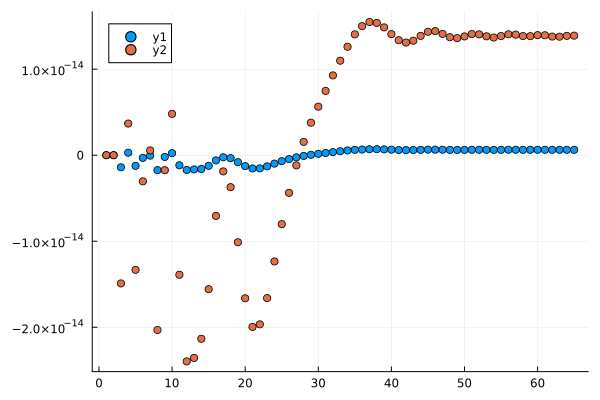

In [195]:
scatter(real(acc(Z,65)))
scatter!(real(acc(Za,65)))

In [200]:
range(1,20,65)

1.0:0.296875:20.0

In [196]:
wynn(acc(Za,60)[3:60])/wynn(acc(Z,60)[3:60])

15.836235774566784 + 3.0350038604795473im

The value gets closer to the classical solution if the spectrum is refined

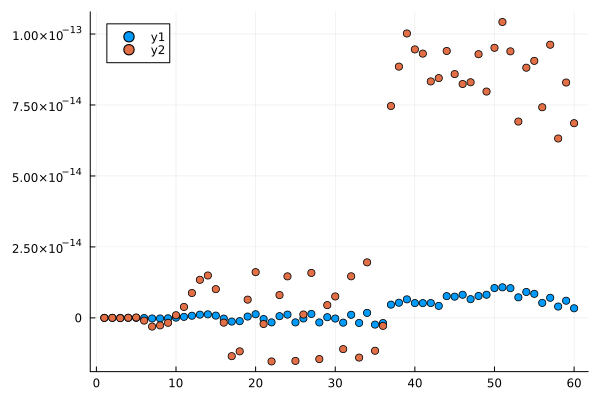

In [181]:
scatter(real(acc_rect(Z,60)))
scatter!(real(acc_rect(Za,60)))

In [182]:
wynn(acc_rect(Za,60))/wynn(acc_rect(Z,60))

12.613758868241005 - 3.6175577532271053im

In [180]:
acc_rect(Za,60)

60-element Vector{ComplexF64}:
                     0.0 + 0.0im
   9.019658325146978e-18 + 7.572800544060073e-18im
  -9.321236682154242e-17 + 1.3979452778961903e-17im
   5.025256330746614e-17 - 2.4587125004108606e-17im
  1.3296559885334144e-16 + 4.2661339948524807e-16im
  -9.691228678469437e-16 + 8.604403883909896e-16im
 -3.0678879445501456e-15 + 9.886658836834346e-16im
 -2.6435504754208814e-15 + 3.148088392722977e-16im
 -1.7374908410876976e-15 - 3.303840147577293e-15im
   9.328783467869206e-16 - 5.067994802533513e-15im
   3.861371005381621e-15 - 8.057109013386902e-15im
   8.761127465216583e-15 - 1.2306115099819405e-14im
   1.340850928174567e-14 - 1.7744849526202775e-14im
                         ⋮
   7.972939985265592e-14 - 2.0007449692026263e-14im
   9.514341718527809e-14 + 5.097755691436389e-15im
  1.0423423161990074e-13 + 1.38712914242305e-14im
   9.389412863476983e-14 + 4.1916497338475645e-14im
   6.915869497865149e-14 + 3.375863731309133e-14im
   8.813060303620557e-14 + 1.7955127

In [177]:
sum(Za)

6.85854827482991e-14 + 5.905599960776613e-14im